In [104]:
import pandas as pd
from pathlib import Path


DATA_DIR = (Path().resolve().parent / "data" )

df_raw = pd.read_csv(DATA_DIR / "02_processed" / "features_raw.csv")
df_raw.head()

/tmp/ipykernel_9262/344496254.py:7: DtypeWarning: Columns (63,64,65,67,69,71,73,74,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(DATA_DIR / "02_processed" / "features_raw.csv")


,Median_age,M0_4,M5_9,M10_14,M15_19,M20_24,M25_29,M30_34,M35_39,M40_44,...,SA3_NAME21,SA2_CODE21,SA2_NAME21,saleCounter,propertyUnitNumber,propertyHouseNumber,settlementDate,purchasePrice,natureOfProperty,primaryPurpose
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,20,59,20211223.0,352000.0,R,RESIDENCE
1,41.5,636.0,710.0,774.0,696.0,618.0,408.0,522.0,610.0,722.0,...,Wollongong,107041150.0,Woonona - Bulli - Russell Vale,2.0,NaN,28,20211223.0,2510000.0,R,RESIDENCE
2,43.4,349.0,430.0,457.0,414.0,303.0,234.0,284.0,344.0,403.0,...,Wollongong,107041148.0,Thirroul - Austinmer - Coalcliff,3.0,NaN,808 C,20211223.0,1750000.0,V,VACANT LAND
3,33.4,429.0,453.0,376.0,500.0,1124.0,1037.0,720.0,571.0,459.0,...,Wollongong,107041549.0,Wollongong - West,4.0,NaN,51,20211223.0,1200000.0,R,RESIDENCE
4,38.6,338.0,333.0,331.0,310.0,284.0,219.0,272.0,308.0,301.0,...,Wollongong,107041147.0,Helensburgh,5.0,NaN,16,20211224.0,650000.0,R,RESIDENCE


In [105]:
df_clean = df_raw.copy()
target_var = 'purchasePrice'

df_clean.columns

Index(['Median_age', 'M0_4', 'M5_9', 'M10_14', 'M15_19', 'M20_24', 'M25_29',
       'M30_34', 'M35_39', 'M40_44', 'M45_49', 'M50_54', 'M55_59', 'M60_64',
       'M65_69', 'M70_74', 'M75_79', 'M80_84', 'M85_and_ov', 'F0_4', 'F5_9',
       'F10_14', 'F15_19', 'F20_24', 'F25_29', 'F30_34', 'F35_39', 'F40_44',
       'F45_49', 'F50_54', 'F55_59', 'F60_64', 'F65_69', 'F70_74', 'F75_79',
       'F80_84', 'F85_and_ov', 'P0_4', 'P5_9', 'P10_14', 'P15_19', 'P20_24',
       'P25_29', 'P30_34', 'P35_39', 'P40_44', 'P45_49', 'P50_54', 'P55_59',
       'P60_64', 'P65_69', 'P70_74', 'P75_79', 'P80_84', 'P85_and_ov',
       'OBS_VALUE', 'Males', 'Females', 'Persons', 'Sex_ratio', 'lat', 'lon',
       'STE_CODE21', 'STE_NAME21', 'GCC_CODE21', 'GCC_NAME21', 'SA4_CODE21',
       'SA4_NAME21', 'SA3_CODE21', 'SA3_NAME21', 'SA2_CODE21', 'SA2_NAME21',
       'saleCounter', 'propertyUnitNumber', 'propertyHouseNumber',
       'settlementDate', 'purchasePrice', 'natureOfProperty',
       'primaryPurpose'],
   

## Remove NA values

In [106]:
config = {'clean': {'handle_na': 'remove'}}
df_clean = df_clean[~df_clean.loc[:,target_var].isna()]
print([(c,v) for c,v in df_clean.isna().sum().items()])
if config['clean']['handle_na'] == 'remove':
    df_clean = df_clean.dropna()
print("removed NA rows:" , df_raw.shape[0] - df_clean.shape[0])

[('Median_age', 4935), ('M0_4', 4935), ('M5_9', 4935), ('M10_14', 4935), ('M15_19', 4935), ('M20_24', 4935), ('M25_29', 4935), ('M30_34', 4935), ('M35_39', 4935), ('M40_44', 4935), ('M45_49', 4935), ('M50_54', 4935), ('M55_59', 4935), ('M60_64', 4935), ('M65_69', 4935), ('M70_74', 4935), ('M75_79', 4935), ('M80_84', 4935), ('M85_and_ov', 4935), ('F0_4', 4935), ('F5_9', 4935), ('F10_14', 4935), ('F15_19', 4935), ('F20_24', 4935), ('F25_29', 4935), ('F30_34', 4935), ('F35_39', 4935), ('F40_44', 4935), ('F45_49', 4935), ('F50_54', 4935), ('F55_59', 4935), ('F60_64', 4935), ('F65_69', 4935), ('F70_74', 4935), ('F75_79', 4935), ('F80_84', 4935), ('F85_and_ov', 4935), ('P0_4', 4935), ('P5_9', 4935), ('P10_14', 4935), ('P15_19', 4935), ('P20_24', 4935), ('P25_29', 4935), ('P30_34', 4935), ('P35_39', 4935), ('P40_44', 4935), ('P45_49', 4935), ('P50_54', 4935), ('P55_59', 4935), ('P60_64', 4935), ('P65_69', 4935), ('P70_74', 4935), ('P75_79', 4935), ('P80_84', 4935), ('P85_and_ov', 4935), ('OBS

Some properties have lat-lon, but are a weird format of address.
 - Example below gives an address north of South Australia. This is possible, since some of this data is S.A.

In [107]:
df_clean.loc[df_clean['propertyHouseNumber'].isna(), ['lat', 'lon', 'propertyHouseNumber', 'propertyUnitNumber']]

,lat,lon,propertyHouseNumber,propertyUnitNumber


## Visualise distribution across features

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load your dataset
df = df_clean

# Preprocessing
# Convert OBS_VALUE to numeric
df[target_var] = pd.to_numeric(df[target_var], errors='coerce')

# Define which columns are categorical
categorical_features = [
    # 'SA2_CODE21', 
    # 'propertyHouseNumber', 
    # 'propertyUnitNumber', 
    # 'natureOfProperty', 
    'primaryPurpose'
    ]
# Define which columns are numerical (excluding target_var)
numerical_features = df.columns.difference([target_var] + categorical_features + ['GCC_CODE21','GCC_NAME21','SA2_NAME21','SA3_NAME21','SA4_NAME21', 
                                                                                  'SA2_CODE21', 'SA3_CODE21','SA4_CODE21','STE_CODE21','STE_NAME21', 
                                                                                  'settlementDate', 'propertyHouseNumber', 'propertyUnitNumber', 'natureOfProperty', 'lat', 'lon']).to_list()
print("unused features;")
df[df.columns.difference([target_var] + categorical_features + numerical_features)].head()

unused features;


,GCC_CODE21,GCC_NAME21,SA2_CODE21,SA2_NAME21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,STE_CODE21,STE_NAME21,lat,lon,natureOfProperty,propertyHouseNumber,propertyUnitNumber,settlementDate
5,1RNSW,Rest of NSW,107041146.0,Figtree - Keiraville,10704.0,Wollongong,107.0,Illawarra,1.0,New South Wales,-34.436890,150.859803,R,5,18,20211224.0
33,1RNSW,Rest of NSW,107041146.0,Figtree - Keiraville,10704.0,Wollongong,107.0,Illawarra,1.0,New South Wales,-34.436890,150.859803,R,5,18,20211224.0
51,1GSYD,Greater Sydney,116031317.0,Mount Druitt - Whalan,11603.0,Mount Druitt,116.0,Sydney - Blacktown,1.0,New South Wales,-33.762183,150.824140,R,29,1,20211224.0
52,1GSYD,Greater Sydney,116011304.0,Blacktown (North) - Marayong,11601.0,Blacktown,116.0,Sydney - Blacktown,1.0,New South Wales,-33.762085,150.899906,R,7,5,20211224.0
168,1RNSW,Rest of NSW,107041146.0,Figtree - Keiraville,10704.0,Wollongong,107.0,Illawarra,1.0,New South Wales,-34.436890,150.859803,R,5,18,20211224.0


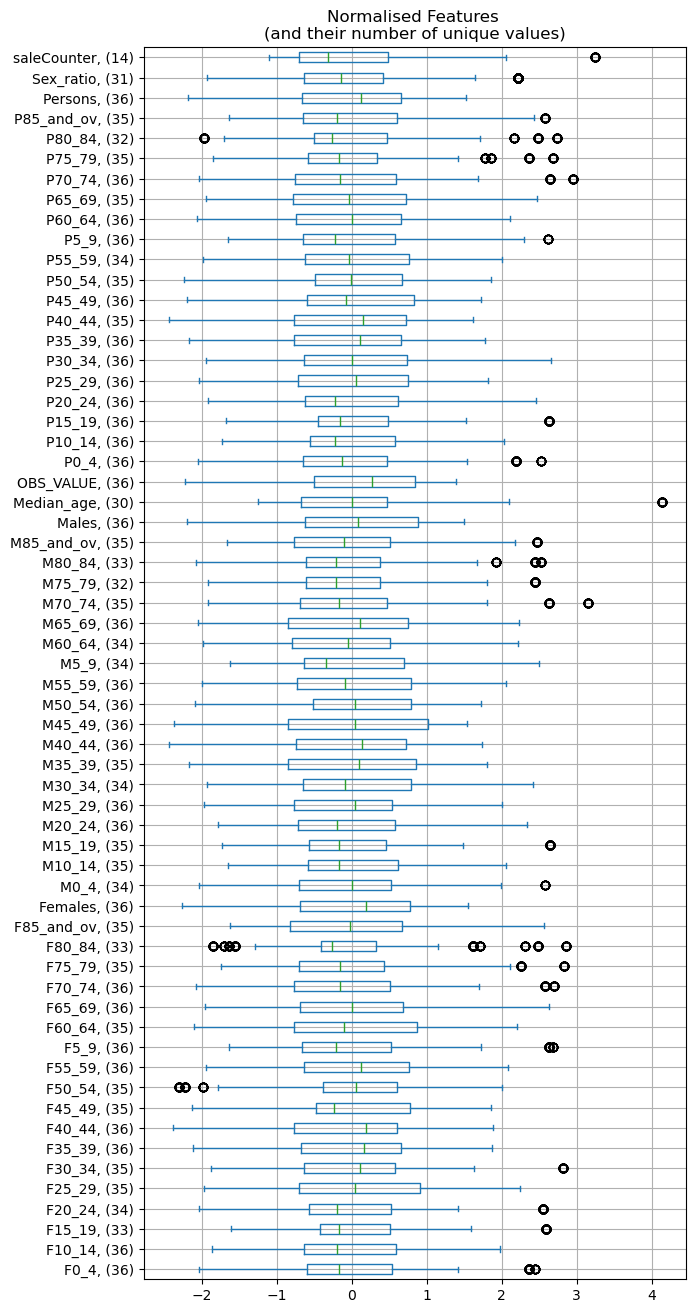

In [109]:
# first convert categorical features to one-hot-encoded variables
df_norm = (df[numerical_features] - df[numerical_features].mean())/df[numerical_features].std()

# Assuming 'df_norm' is your DataFrame
# Create a list of new labels with number of unique values
new_labels = [f"{column}, ({df_norm[column].nunique()})" for column in df_norm.columns]

# Create the boxplot
ax = df_norm.plot(kind='box', vert=False, figsize=(7,16))

# Set the new y-tick labels
ax.set_yticklabels(new_labels)

# Add grid
ax.grid()

# Display the plot
import matplotlib.pyplot as plt

plt.title("Normalised Features \n(and their number of unique values)")
plt.show()


In [110]:
df[numerical_features[:20]].head(3)

,F0_4,F10_14,F15_19,F20_24,F25_29,F30_34,F35_39,F40_44,F45_49,F50_54,F55_59,F5_9,F60_64,F65_69,F70_74,F75_79,F80_84,F85_and_ov,Females,M0_4
5,601.0,759.0,918.0,1209.0,541.0,640.0,739.0,737.0,758.0,700.0,543.0,670.0,611.0,513.0,516.0,388.0,306.0,341.0,11490.0,629.0
33,601.0,759.0,918.0,1209.0,541.0,640.0,739.0,737.0,758.0,700.0,543.0,670.0,611.0,513.0,516.0,388.0,306.0,341.0,11490.0,629.0
51,974.0,836.0,747.0,824.0,858.0,893.0,908.0,764.0,644.0,652.0,629.0,1008.0,528.0,472.0,413.0,244.0,171.0,137.0,11702.0,939.0


In [111]:
df[numerical_features[20:40]].head(3)

,M10_14,M15_19,M20_24,M25_29,M30_34,M35_39,M40_44,M45_49,M50_54,M55_59,M5_9,M60_64,M65_69,M70_74,M75_79,M80_84,M85_and_ov,Males,Median_age,OBS_VALUE
5,798.0,1011.0,1287.0,871.0,637.0,701.0,688.0,744.0,676.0,591.0,669.0,519.0,479.0,367.0,384.0,256.0,220.0,11527.0,36.0,18677.0
33,798.0,1011.0,1287.0,871.0,637.0,701.0,688.0,744.0,676.0,591.0,669.0,519.0,479.0,367.0,384.0,256.0,220.0,11527.0,36.0,18677.0
51,903.0,786.0,821.0,774.0,826.0,945.0,836.0,716.0,657.0,616.0,883.0,533.0,443.0,353.0,243.0,139.0,93.0,11506.0,33.7,17470.0


In [112]:
df[numerical_features[40:]].head(3)

,P0_4,P10_14,P15_19,P20_24,P25_29,P30_34,P35_39,P40_44,P45_49,P50_54,...,P5_9,P60_64,P65_69,P70_74,P75_79,P80_84,P85_and_ov,Persons,Sex_ratio,saleCounter
5,1230.0,1557.0,1929.0,2496.0,1412.0,1277.0,1440.0,1425.0,1502.0,1376.0,...,1339.0,1130.0,992.0,883.0,772.0,562.0,561.0,23017.0,100.3,6.0
33,1230.0,1557.0,1929.0,2496.0,1412.0,1277.0,1440.0,1425.0,1502.0,1376.0,...,1339.0,1130.0,992.0,883.0,772.0,562.0,561.0,23017.0,100.3,6.0
51,1913.0,1739.0,1533.0,1645.0,1632.0,1719.0,1853.0,1600.0,1360.0,1309.0,...,1891.0,1061.0,915.0,766.0,487.0,310.0,230.0,23208.0,98.3,16.0


### Questions about data provenance
- Whats the range of settlement dates suppsoed to be?
- Is this supposed to be NSW only (with small amount of S.A.)?


In [113]:
df['settlementDate'].value_counts()

settlementDate
20211224.0    1059
20211229.0     364
20211230.0     110
20211223.0      34
Name: count, dtype: int64

In [114]:
# Define the preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = Lasso(alpha=0.05, max_iter = 2000 )

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and test sets
X = df.loc[df.primaryPurpose=='RESIDENCE',:].drop(target_var, axis=1)
y = df.loc[df.primaryPurpose=='RESIDENCE',target_var].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred) / 1000
print(f"Mean Squared Error: {mse} (thousands)")

# Get model coefficients for interpretation
coefs = pipeline.named_steps['model'].coef_
# Match coefficients to column names in preprocessed data
columns = (pipeline.named_steps['preprocessor'].transformers_[0][2] +
           list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
coef_df = pd.DataFrame(coefs, index=columns, columns=['Coefficients'])
print(f"Shape of in X: {X_train.shape}, resulting features selected: {coef_df.shape[0]}")

Mean Squared Error: 1268875.6926004903 (thousands)
Shape of in X: (1152, 78), resulting features selected: 62


/home/sam/anaconda3/envs/prop/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.342e+11, tolerance: 1.317e+11
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Effect size of features')

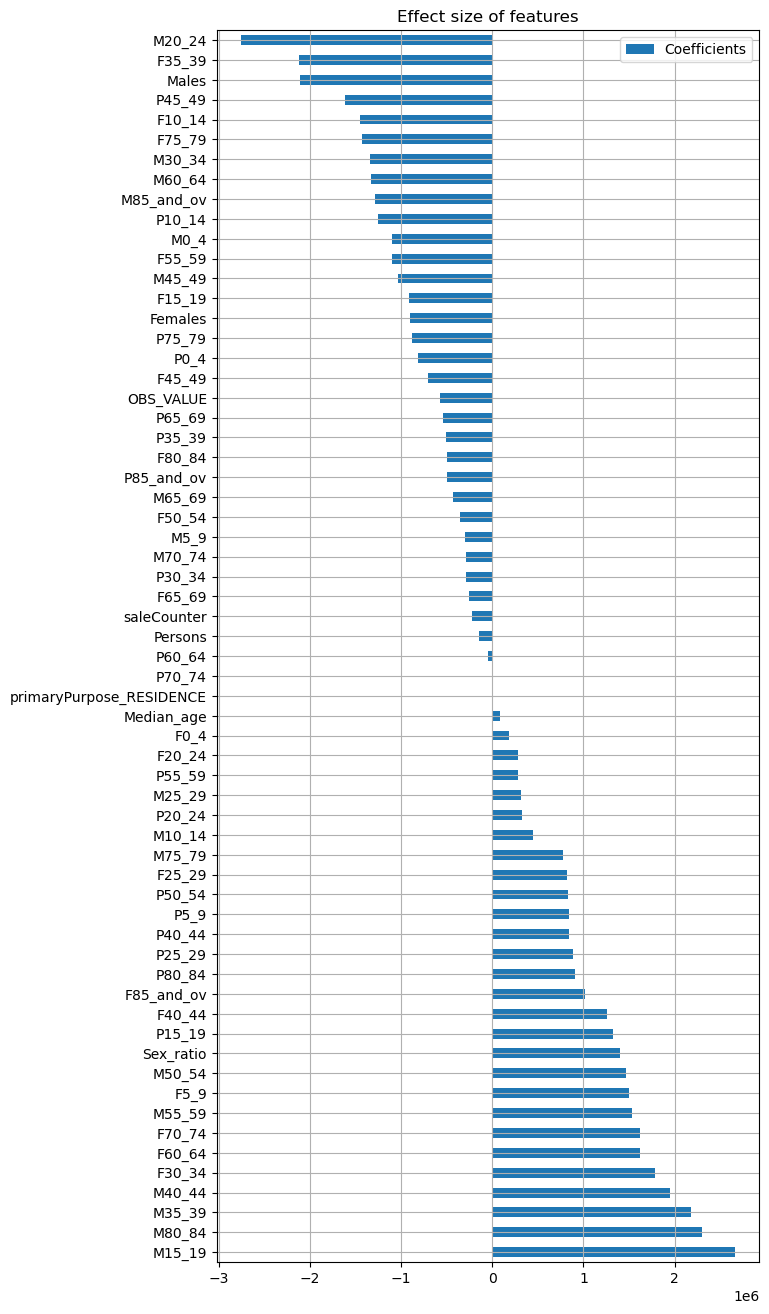

In [115]:
import matplotlib.pyplot as plt
coef_df.sort_values(by='Coefficients', ascending=False).plot(kind='barh', figsize=(7,16)).grid()
plt.title("Effect size of features")

## Model Performance
- RMSE
- RMSE by categories

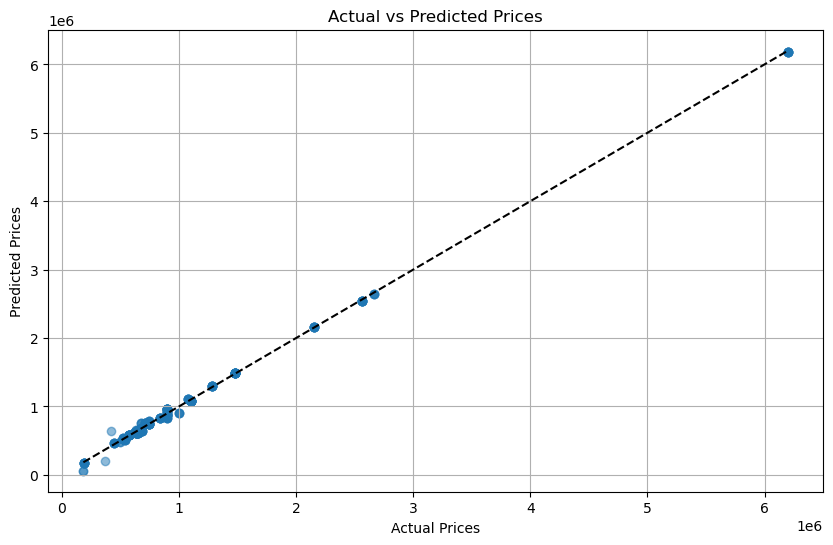

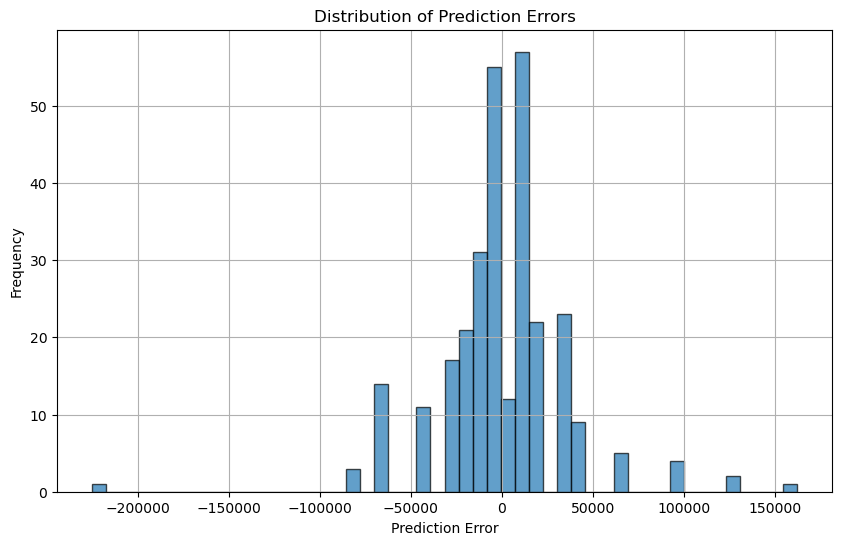

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y_actual' contains the actual prices and 'y_predicted' contains the predicted prices
y_predicted = y_pred
y_actual = y_test

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_predicted, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--') # Diagonal line for reference
plt.grid(True)
plt.show()

# Histogram of prediction errors
errors = y_actual - y_predicted
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [130]:
X_test[y_test> y_test.quantile(.95)].join(y_test/1000)

,Median_age,M0_4,M5_9,M10_14,M15_19,M20_24,M25_29,M30_34,M35_39,M40_44,...,saleCounter,propertyUnitNumber,propertyHouseNumber,settlementDate,natureOfProperty,primaryPurpose,Under_29,Between_30_44,Over_45,purchasePrice
15824,34.6,534.0,446.0,496.0,431.0,478.0,1054.0,1316.0,921.0,660.0,...,2.0,2,17,20211224.0,R,RESIDENCE,3626.0,2951.0,3221.0,6200.0
46238,37.3,268.0,392.0,349.0,234.0,268.0,348.0,373.0,449.0,444.0,...,1.0,9,8,20211223.0,R,RESIDENCE,1652.0,1374.0,1671.0,2669.0
37519,34.6,534.0,446.0,496.0,431.0,478.0,1054.0,1316.0,921.0,660.0,...,2.0,2,17,20211224.0,R,RESIDENCE,3626.0,2951.0,3221.0,6200.0
36533,37.3,268.0,392.0,349.0,234.0,268.0,348.0,373.0,449.0,444.0,...,1.0,9,8,20211223.0,R,RESIDENCE,1652.0,1374.0,1671.0,2669.0
37664,37.3,268.0,392.0,349.0,234.0,268.0,348.0,373.0,449.0,444.0,...,1.0,9,8,20211223.0,R,RESIDENCE,1652.0,1374.0,1671.0,2669.0
25833,34.6,534.0,446.0,496.0,431.0,478.0,1054.0,1316.0,921.0,660.0,...,2.0,2,17,20211224.0,R,RESIDENCE,3626.0,2951.0,3221.0,6200.0
57088,34.6,534.0,446.0,496.0,431.0,478.0,1054.0,1316.0,921.0,660.0,...,2.0,2,17,20211224.0,R,RESIDENCE,3626.0,2951.0,3221.0,6200.0
42233,34.6,534.0,446.0,496.0,431.0,478.0,1054.0,1316.0,921.0,660.0,...,2.0,2,17,20211224.0,R,RESIDENCE,3626.0,2951.0,3221.0,6200.0
38689,34.6,534.0,446.0,496.0,431.0,478.0,1054.0,1316.0,921.0,660.0,...,2.0,2,17,20211224.0,R,RESIDENCE,3626.0,2951.0,3221.0,6200.0
42378,37.3,268.0,392.0,349.0,234.0,268.0,348.0,373.0,449.0,444.0,...,1.0,9,8,20211223.0,R,RESIDENCE,1652.0,1374.0,1671.0,2669.0


### Prediction errors by category

<Figure size 1000x1200 with 0 Axes>

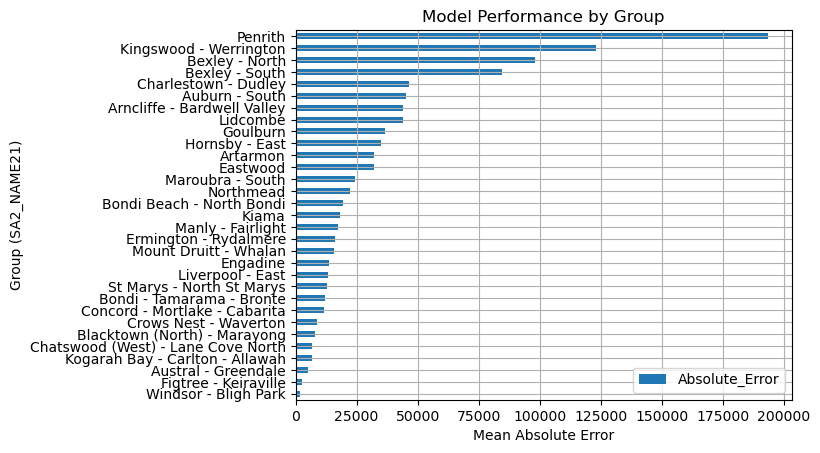

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_test' is your DataFrame with the test features, 'y_actual' contains the actual prices,
# and 'y_predicted' contains the predicted prices, with the same index as 'X_test'.

# Calculate the absolute errors
errors = abs(y_predicted - y_actual)

# Add errors and the grouping variable to a new DataFrame
performance_df = pd.DataFrame({'SA2_NAME21': X_test['SA2_NAME21'], 'Absolute_Error': errors, 'true': y_actual, 'predicted': y_predicted})

# Calculate the mean absolute error for each group
grouped_performance = performance_df.groupby('SA2_NAME21')[['Absolute_Error','true']].mean()

# Sort the performance by error for better visualization
grouped_performance_sorted = grouped_performance.sort_values(by='Absolute_Error', ascending=True)

# Plot horizontal bar plot of mean absolute error by group
plt.figure(figsize=(10, 12))
grouped_performance_sorted[['Absolute_Error']].plot(kind='barh')
plt.title('Model Performance by Group')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Group (SA2_NAME21)')
plt.grid(True)
plt.show()

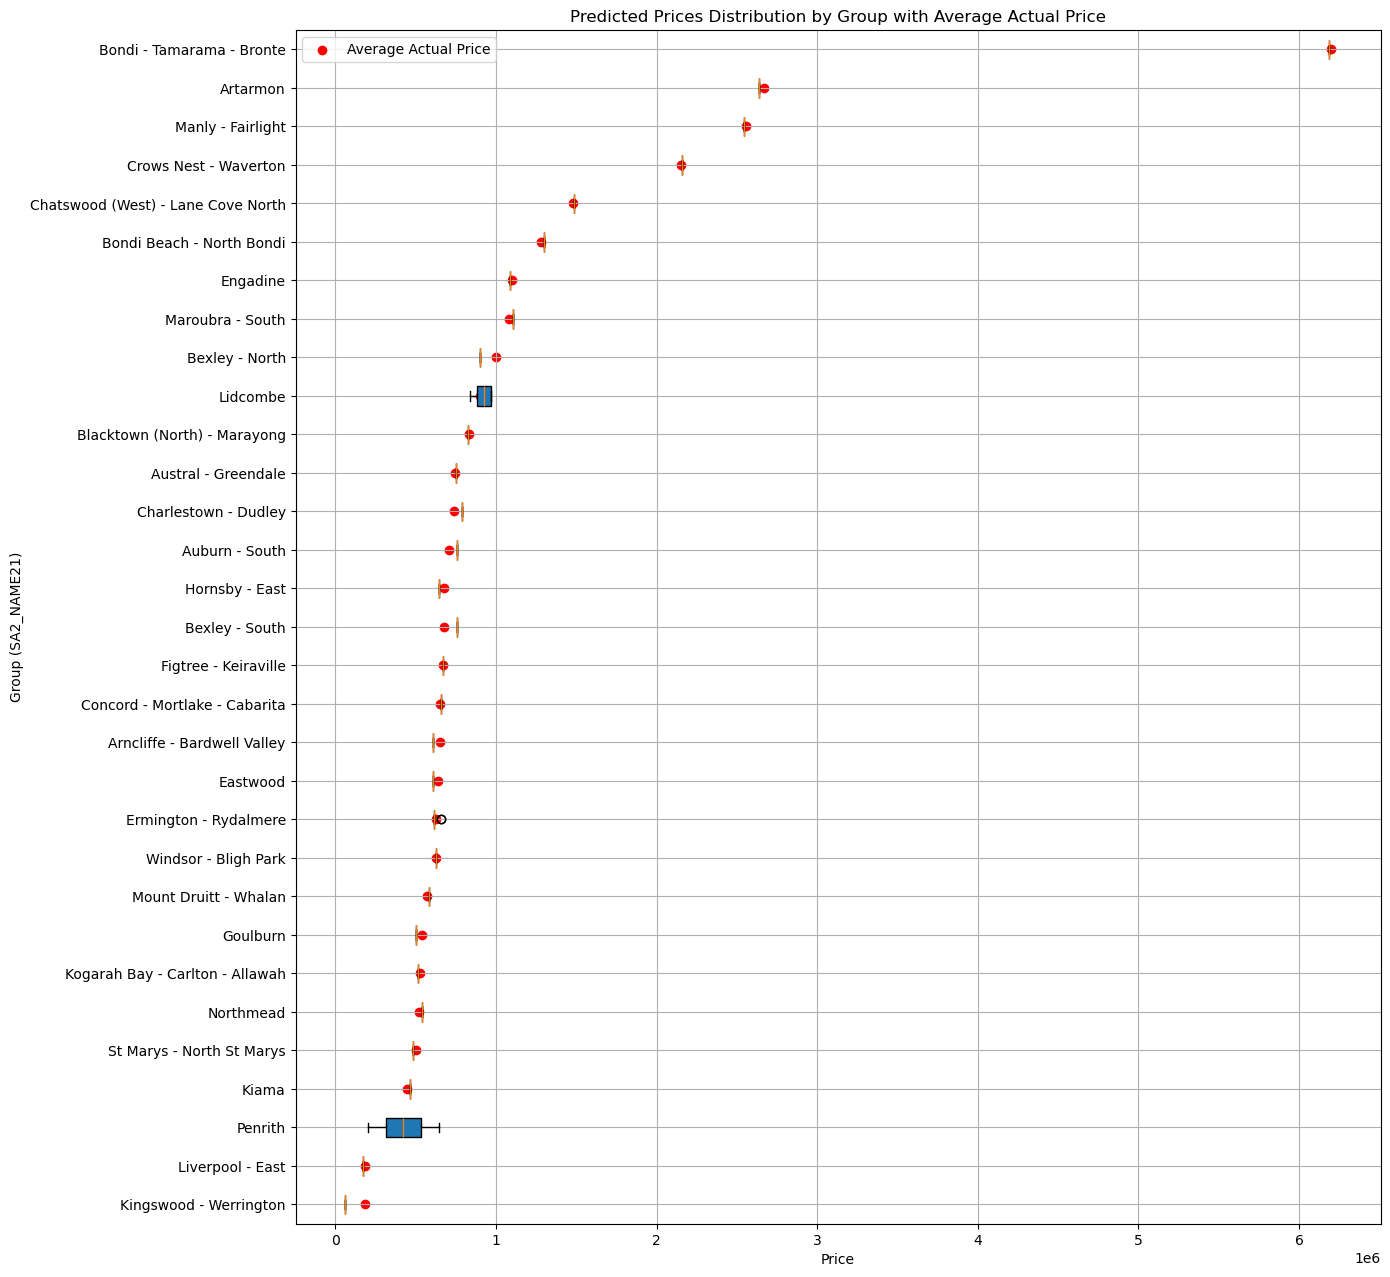

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_test' is your DataFrame with the test features, 'y_actual' contains the actual prices,
# and 'y_predicted' contains the predicted prices, with the same index as 'X_test'.

# Create a DataFrame with needed data
performance_df = pd.DataFrame({
    'SA2_NAME21': X_test['SA2_NAME21'],
    'Predicted_Price': y_predicted,
    'Actual_Price': y_actual
})

# Group by 'SA2_NAME21' to calculate the average actual price and collect predicted prices for the boxplot
grouped_performance = performance_df.groupby('SA2_NAME21').agg({
    'Actual_Price': 'mean',
    'Predicted_Price': lambda x: list(x)
})

# Sort by average actual price for a more systematic visualization
grouped_performance_sorted = grouped_performance.sort_values(by='Actual_Price', ascending=True)

# Create the boxplot for predicted prices
fig, ax = plt.subplots(figsize=(14, len(grouped_performance_sorted) / 2))
positions = range(len(grouped_performance_sorted))
boxplot_data = grouped_performance_sorted['Predicted_Price'].tolist()
ax.boxplot(boxplot_data, vert=False, positions=positions, patch_artist=True)

# Overlay the average actual prices as a scatter plot
avg_prices = grouped_performance_sorted['Actual_Price']
ax.scatter(avg_prices, positions, color='r', label='Average Actual Price')

# Set y-axis labels to the group names
ax.set_yticks(positions)
ax.set_yticklabels(grouped_performance_sorted.index)

# Labeling the plot
ax.set_title('Predicted Prices Distribution by Group with Average Actual Price')
ax.set_xlabel('Price')
ax.set_ylabel('Group (SA2_NAME21)')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [120]:
# Assuming X_test is your DataFrame

# Sum columns for people under 29
X_test['Under_29'] = X_test[['P0_4', 'P5_9', 'P10_14', 'P15_19', 'P20_24', 'P25_29']].sum(axis=1)

# Sum columns for people between 30 and 44
X_test['Between_30_44'] = X_test[['P30_34', 'P35_39', 'P40_44']].sum(axis=1)

# Sum columns for people over 45
X_test['Over_45'] = X_test[['P45_49', 'P50_54', 'P55_59', 'P60_64', 'P65_69', 'P70_74', 'P75_79', 'P80_84', 'P85_and_ov']].sum(axis=1)


# Sum columns for people under 29
X_test['Under_29'] = X_test[['M0_4', 'M5_9', 'M10_14', 'M15_19', 'M20_24', 'M25_29']].sum(axis=1)

# Sum columns for MeoMle between 30 and 44
X_test['Between_30_44'] = X_test[['M30_34', 'M35_39', 'M40_44']].sum(axis=1)

# Sum columns for MeoMle over 45
X_test['Over_45'] = X_test[['M45_49', 'M50_54', 'M55_59', 'M60_64', 'M65_69', 'M70_74', 'M75_79', 'M80_84', 'M85_and_ov']].sum(axis=1)

# Sum columns for people under 29
X_test['Under_29'] = X_test[['F0_4', 'F5_9', 'F10_14', 'F15_19', 'F20_24', 'F25_29']].sum(axis=1)

# Sum columns for MeoMle between 30 and 44
X_test['Between_30_44'] = X_test[['F30_34', 'F35_39', 'F40_44']].sum(axis=1)

# Sum columns for MeoMle over 45
X_test['Over_45'] = X_test[['F45_49', 'F50_54', 'F55_59', 'F60_64', 'F65_69', 'F70_74', 'F75_79', 'F80_84', 'F85_and_ov']].sum(axis=1)

# Now X_test has three new columns: 'Under_29', 'Between_30_44', 'Over_45'

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate normalized prediction error
normalized_errors = np.abs(y_test - y_predicted) # / y_predicted

# Create a DataFrame from the normalized errors
errors_df = pd.DataFrame({
    'Normalized_Error': normalized_errors,
    'Under_29': X_test['Under_29'],
    'Between_30_44': X_test['Between_30_44'],
    'Over_45': X_test['Over_45']
})

# Melt the DataFrame to have one row per age category per observation
errors_melted = errors_df.melt(id_vars=['Normalized_Error'],
                               value_vars=['Under_29', 'Between_30_44', 'Over_45'],
                               var_name='Age_Category',
                               value_name='People_Count')

# Exclude rows where the People_Count is zero, as they do not correspond to the category
errors_melted = errors_melted[errors_melted['People_Count'] > 0]

# Group by the 'Age_Category' and calculate the mean normalized error
mean_normalized_error_by_age = errors_melted.groupby('Age_Category')['Normalized_Error'].mean().reset_index()


### ANOCOVA - is there a significant effect of Age_Category on Normalized_Error?

In [122]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame with the relevant columns

# Fit the ANCOVA model
model = ols('Normalized_Error ~ C(Age_Category) + People_Count', data=errors_melted).fit()

# Perform the ANCOVA
ancova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(ancova_table)

                       sum_sq     df         F    PR(>F)
C(Age_Category)  2.117372e+09    2.0  1.551928  0.212432
People_Count     6.579381e+09    1.0  9.644718  0.001961
Residual         5.866701e+11  860.0       NaN       NaN


No. But people count might

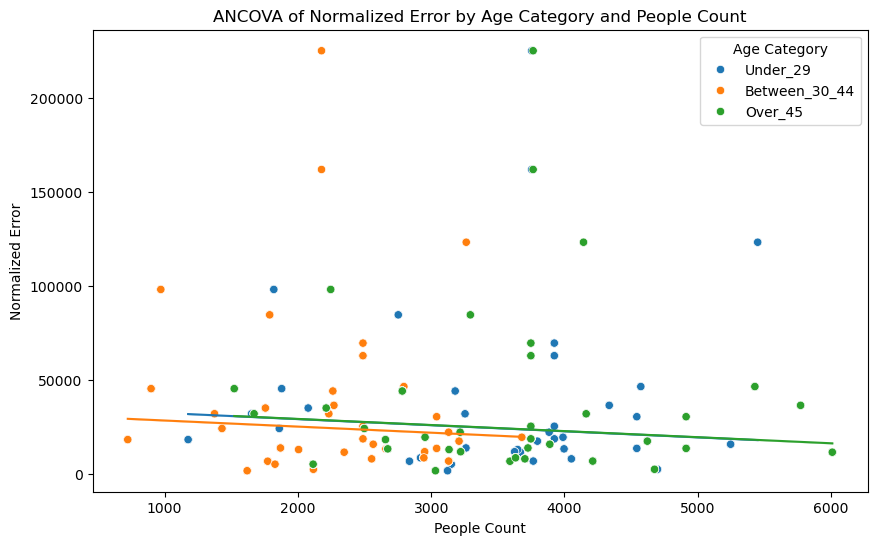

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame with the relevant columns

# Fit the ANCOVA model
model = ols('Normalized_Error ~ C(Age_Category) + People_Count', data=errors_melted).fit()

# Get the predicted values from the model
errors_melted['Predicted_Error'] = model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))

# Use seaborn to create the scatterplot and fitted lines
sns.scatterplot(data=errors_melted, x='People_Count', y='Normalized_Error', hue='Age_Category')
sns.lineplot(data=errors_melted, x='People_Count', y='Predicted_Error', hue='Age_Category', legend=False)

# Customize the plot
plt.title('ANCOVA of Normalized Error by Age Category and People Count')
plt.xlabel('People Count')
plt.ylabel('Normalized Error')

plt.legend(title='Age Category')
plt.show()

In [124]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'df' is your DataFrame with the relevant columns

# Fit the ANCOVA model
model = ols('Normalized_Error ~ C(Age_Category) + People_Count', data=errors_melted).fit()

# Get the ANOVA table
ancova_table = sm.stats.anova_lm(model, typ=2)

# Check if Age_Category has a significant effect
if ancova_table.loc['C(Age_Category)', 'PR(>F)'] < 0.05:
    # If significant, perform Tukey's HSD post-hoc test
    tukey = pairwise_tukeyhsd(endog=errors_melted['Normalized_Error'], groups=errors_melted['Age_Category'], alpha=0.05)
    print(tukey.summary())
else:
    print("No significant effect of Age_Category on Normalized_Error found.")

# The rest of the code remains the same...

No significant effect of Age_Category on Normalized_Error found.
